In [19]:
# 자바 설치는 인터넷 참조 - 자바는 MyBox에 있음.
#2024년 08월 05일
#자바 버전 확인:
#cmd
#java -version
#javac -version

#1.
#cmd
#pip install jpype1 : java Lib 사용 가능
#pip install konlpy

In [20]:
import pandas as pd
from konlpy.tag import Okt

# 텍스트 파일 경로 설정
file_path = "D:/git_crawling/blog_contents.txt"

# 텍스트 파일 불러오기
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

# 한글 명사 추출
okt = Okt()
nouns = okt.nouns(content)

# 명사를 데이터 프레임으로 변환
df_word = pd.DataFrame({'word': nouns})

# 결과 확인
print(df_word.head())


  word
0   기후
1   위기
2  해결사
3  사이다
4   탐정


In [21]:
# 글자 수 열 추가
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,기후,2
1,위기,2
2,해결사,3
3,사이다,3
4,탐정,2
...,...,...
15619,구체,2
15620,위협,2
15621,후미,2
15622,출처,2


In [22]:
# 두 글자 이상 단어만 남김 - 글자에 의미가 있어야 함.
df_word = df_word.query('count >=2')
df_word.sort_values('count')

,word,count
0,기후,2
9740,갑천,2
9742,도시,2
9745,관통,2
9746,대전,2
...,...,...
3592,일러스트레이터,7
8732,아파르트헤이트,7
4258,농림축산식품부,7
4309,농림축산식품부,7


In [23]:
# 단어 빈도 구하기
# 단어별 분리
# 빈도 구하기
# 내림차순 정렬
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending= False)
df_word

,word,n
428,기후,376
1902,위기,275
3044,환경,98
2708,탄소,94
2440,지구,93
...,...,...
631,대청댐,1
1781,영상편집,1
632,대체에너지,1
1779,영국인,1


In [24]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
428,기후,376
1902,위기,275
3044,환경,98
2708,탄소,94
2440,지구,93
1858,우리,81
1717,에너지,79
169,계획,70
1912,위해,66
623,대응,66


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# 가로 세로 크기 설정  + 폰트
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                    'figure.dpi'  : '120',
                    'figure.figsize' : [6.5, 6]})


<Axes: xlabel='n', ylabel='word'>

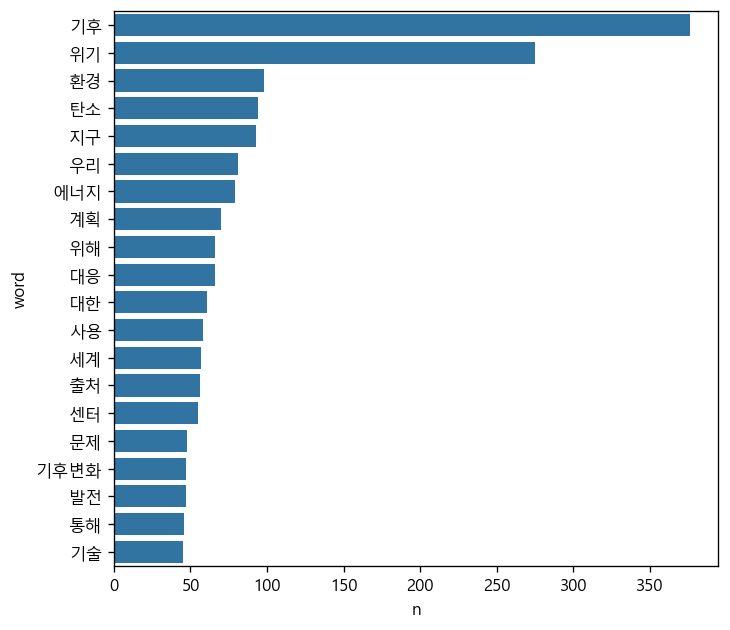

In [26]:
# 막대 그래프 만들기
sns.barplot(data = top20, y='word', x='n')

In [27]:
# pip install wordcloud - cmd에서 실시

In [28]:
font = 'malgun.ttf'

In [29]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'기후': 376,
 '위기': 275,
 '환경': 98,
 '탄소': 94,
 '지구': 93,
 '우리': 81,
 '에너지': 79,
 '계획': 70,
 '위해': 66,
 '대응': 66,
 '대한': 61,
 '사용': 58,
 '세계': 57,
 '출처': 56,
 '센터': 55,
 '문제': 48,
 '기후변화': 47,
 '발전': 47,
 '통해': 46,
 '기술': 45,
 '배출': 44,
 '정책': 43,
 '사회': 43,
 '중립': 41,
 '폭염': 41,
 '생각': 40,
 '석탄': 40,
 '영향': 40,
 '이야기': 39,
 '도시': 39,
 '이미지': 38,
 '올림픽': 38,
 '시대': 38,
 '뱅크': 37,
 '게티': 37,
 '적응': 37,
 '활동': 37,
 '변화': 34,
 '증가': 34,
 '파리': 34,
 '가장': 34,
 '환경부': 34,
 '쓰레기': 33,
 '지역': 33,
 '국가': 32,
 '사람': 32,
 '노력': 32,
 '한국': 32,
 '기반': 32,
 '실천': 31,
 '전력': 31,
 '재생에너지': 30,
 '지금': 30,
 '탐정': 30,
 '정부': 29,
 '진행': 29,
 '활용': 29,
 '발생': 29,
 '모두': 29,
 '데이터': 29,
 '사이다': 29,
 '이상': 29,
 '하천': 28,
 '지속': 28,
 '대해': 28,
 '발전소': 28,
 '성장': 28,
 '상승': 27,
 '건설': 27,
 '정보': 27,
 '현재': 27,
 '사업': 26,
 '제공': 26,
 '때문': 26,
 '상황': 26,
 '운영': 26,
 '인간': 26,
 '또한': 26,
 '대비': 25,
 '이번': 25,
 '전환': 25,
 '우리나라': 25,
 '피해': 24,
 '예측': 24,
 '해결': 24,
 '자연': 24,
 '온실가스': 24,
 '기업': 24,
 '생산': 24,
 

In [30]:
# Word Cloud 만들기
from wordcloud import WordCloud

In [31]:
wc = WordCloud(random_state = 1234,          # 난수 고정
                font_path = font,             # 폰트 설정
                width = 400,                  # 가로 크기
                height = 400,                 # 세로 크기
                background_color = 'white')   # 배경색

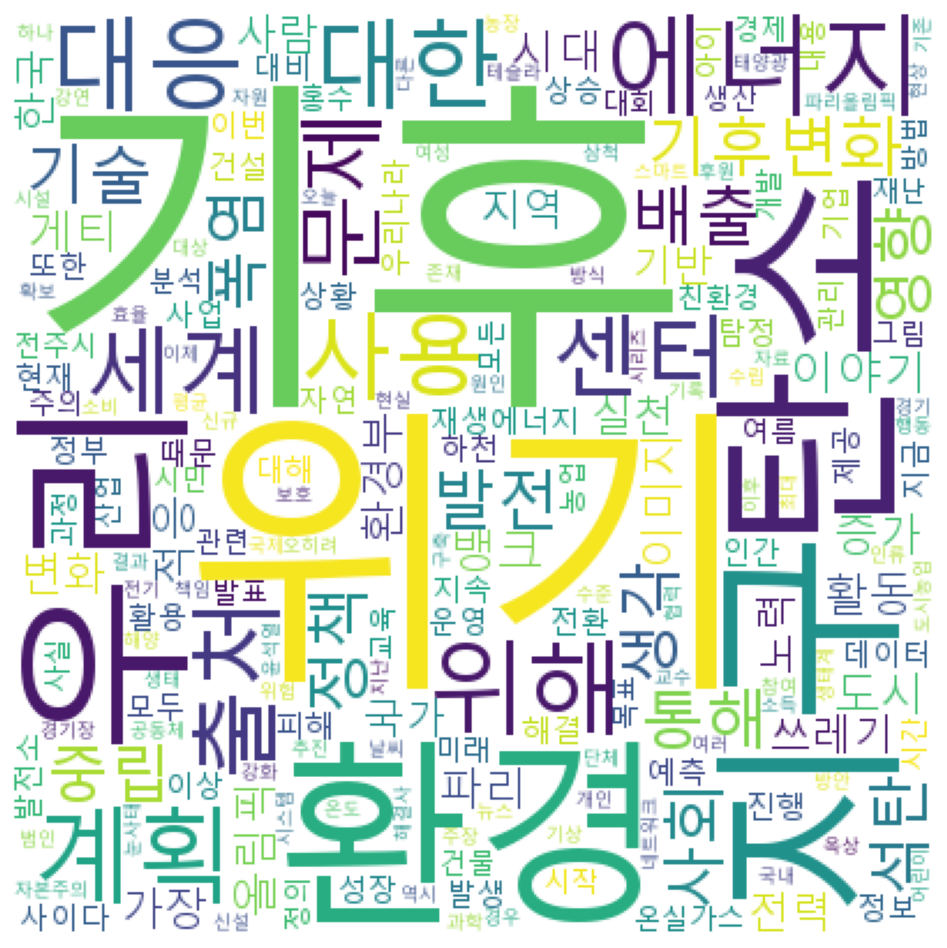

In [32]:
# 워드 클라우드(wc) 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드(wc) 출력 #
plt.figure(figsize=(10,10)) # 가로, 세로 크기 설정
plt.axis('off') # 워드 클라우드니까 x축 필요없음. 테두리 선 없애기
plt.imshow(img_wordcloud)

In [33]:
# mask 적용 
import PIL
import PIL.Image
icon = PIL.Image.open('d:/data/world.png')

In [34]:
# png 파일로 mask 생성
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img = np.array(img)

In [35]:
wc = WordCloud(random_state = 1234,          # 난수 고정
                font_path = font,             # 폰트 설정
                width = 400,                  # 가로 크기
                height = 400,                 # 세로 크기
                background_color = 'white',   # 배경색
                mask = img)

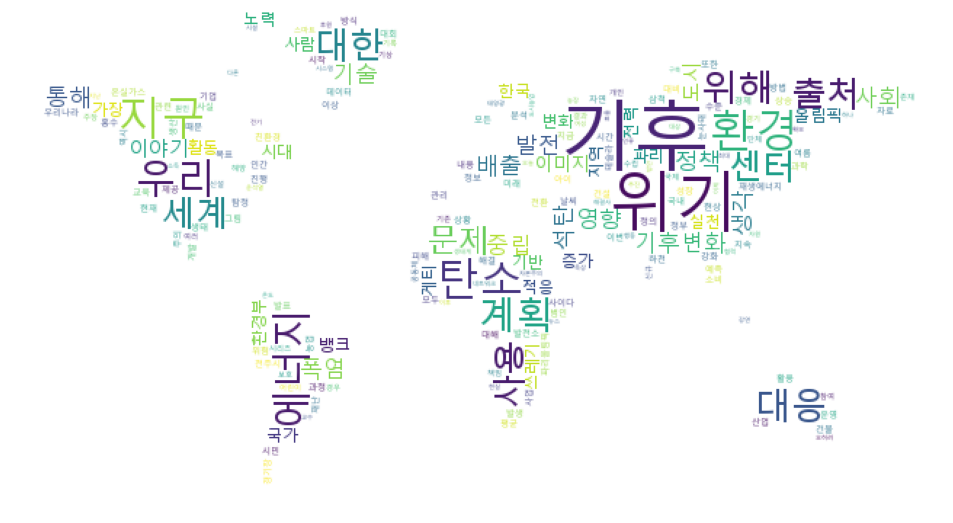

In [36]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력 #
plt.figure(figsize=(10,10)) # 가로, 세로 크기 설정
plt.axis('off') # 테두리 선 없애기
plt.imshow(img_wordcloud)